In [ ]:
# librerías
import numpy as np
np.random.seed(2024)
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from itertools import product
# guardado de gráficos
def save_plot(title='plot', path='./informe/img/'):
  plt.savefig(f'{path}{title}.png', dpi=200, bbox_inches='tight')

$\underline{\text{TP2 - Ejercicio 8}}$  
Entrenar un perceptrón multicapa que resuelva una $\text{XOR}$ de $2$ entradas mediante simulated annealing. Graficar el error a lo largo del proceso de aprendizaje.

In [247]:
layers = [2, 2, 1] # neuronas por capa del MLP
n_layers = len(layers)
weights = [np.random.randn(l * m) for l, m in zip(layers[1:], layers[:-1])] # generar una solución inicial

get_loss = lambda y_true, y_pred: np.mean((y_true - y_pred) ** 2) # mse
activation = lambda x: np.tanh(x)

def predict(input, weights):
    output = input
    for w in weights:
        output = activation(np.dot(input, w))
    output = 1 if output > 0 else -1 # estoy clasificando
    return output

def perturbate(weights, temperature):
    perturbations = [np.random.randn(len(w)) for w in weights]
    new_weights = [w + temperature * p for w, p in zip(weights, perturbations)] # perturbo en proporción a la temperatura
    return new_weights

x_train = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train = [0, 1, 1, 0]

y_pred = [predict(x, weights) for x in x_train]
temperature = get_loss(y_train, y_pred) # temperatura inicial

errors = []
while temperature > 100:
    for _ in range(1000):
        new_weights = perturbate(weights, temperature)

        y_pred = [predict(x, weights) for x in x_train]
        new_y_pred = [predict(x, new_weights) for x in x_train]

        loss = get_loss(y_train, y_pred)
        new_loss = get_loss(y_train, new_y_pred)

        if new_loss < loss or np.random.rand() < np.exp((new_loss - loss) / temperature):
            weights = new_weights
        
        errors.append(loss)
    temperature *= 0.9

ValueError: shapes (2,) and (4,) not aligned: 2 (dim 0) != 4 (dim 0)

$\underline{\text{TP3 - Ejercicio 1}}$  
Construya una red de Kohonen de $2$ entradas que parenda una distribución uniforme dentro del círculo unitario. Mostrar el mapa de preservación de topología. Probar con distribuciones uniformes dentro de otras figuras geométricas.

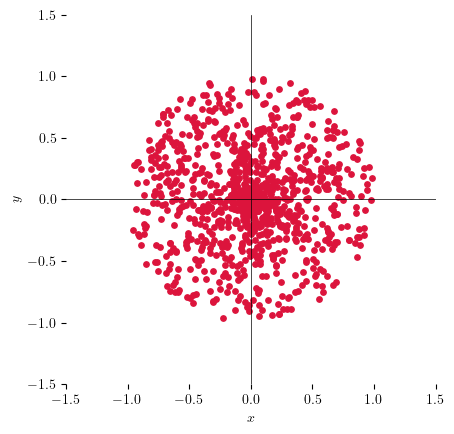

In [ ]:
def generate_unit_circle_points(n_points):
    points = []
    for _ in range(n_points):
        r = np.random.uniform(0, 1)
        theta = np.random.uniform(0, 2 * np.pi)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        points.append([x, y])
    return np.array(points)

def scatter_figure(points, x_lim, y_lim):
    plt.scatter(points[:,0], points[:,1], color='crimson', s=15)
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='-')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='-')

unit_circle_points = generate_unit_circle_points(1000)
scatter_figure(unit_circle_points, (-1.5, 1.5), (-1.5, 1.5))

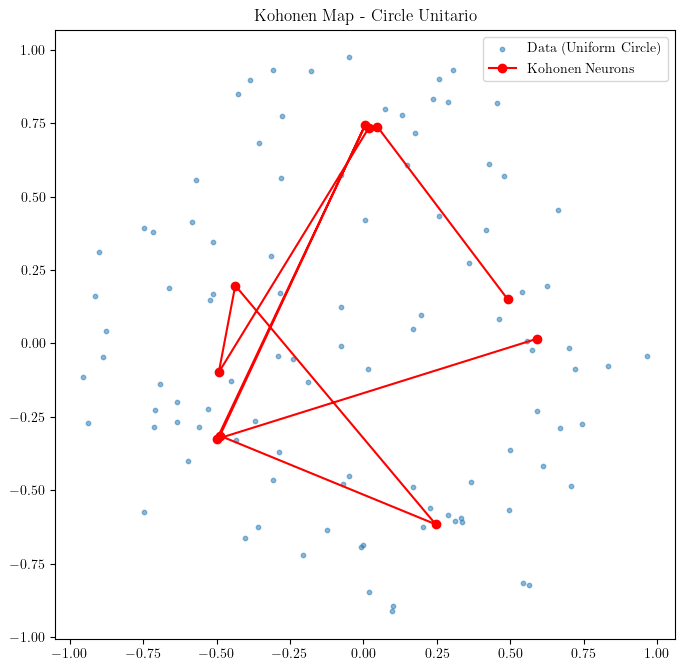

In [117]:
# Step 1: Generate uniform data within the unit circle
def generate_circle_data(n_points):
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    radii = np.sqrt(np.random.uniform(0, 1, n_points))  # Uniform distribution in circle
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)
    return np.vstack((x, y)).T

data = generate_circle_data(100)

# Step 2: Initialize the Kohonen map
n_neurons = 10
neurons = np.random.uniform(-1, 1, (n_neurons, 2))  # Initial positions of neurons

# Parameters
learning_rate = 0.1
sigma = 0.5  # Neighborhood radius
n_iterations = 10000

# Gaussian neighborhood function
def gaussian_neighborhood(distance, sigma):
    return np.exp(-distance**2 / (2 * sigma**2))

# Step 3: Train the Kohonen network
for t in range(n_iterations):
    # Select a random data point
    sample = data[np.random.choice(data.shape[0])]
    
    # Compute distances to all neurons
    distances = np.linalg.norm(neurons - sample, axis=1)
    
    # Find the Best Matching Unit (BMU)
    bmu_idx = np.argmin(distances)
    
    # Update neurons
    for i, neuron in enumerate(neurons):
        dist_to_bmu = np.linalg.norm(neurons[bmu_idx] - neuron)
        influence = gaussian_neighborhood(dist_to_bmu, sigma)
        neurons[i] += learning_rate * influence * (sample - neuron)
    
    # Decrease learning rate and sigma over time
    learning_rate *= 0.995
    sigma *= 0.995

# Step 4: Visualize the results
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], s=10, alpha=0.5, label="Data (Uniform Circle)")
plt.plot(neurons[:, 0], neurons[:, 1], '-o', color='red', label="Kohonen Neurons")
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Kohonen Map - Circle Unitario")
plt.legend()
plt.show()